In [10]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

#PREPARING DATASET

In [11]:
Diabetes= pd.read_csv('diabetes_data_upload.csv') # loading the dataset

In [12]:
Diabetes.head(10) # Displays top 10 records of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [13]:
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [14]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [15]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


#EXPLORATORY DATA ANALYSIS

In [16]:
pip show nbformat

Name: nbformatNote: you may need to restart the kernel to use updated packages.

Version: 5.10.3
Summary: The Jupyter Notebook format
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from

##DISTRIBUTION OF GENDER

In [17]:
import plotly.express as px    # For Creating Interactive graphs
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Postive/Negative count Vs Gender")
gendis.show()
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [18]:
agehist= px.histogram(Diabetes, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()


In [19]:
genbox = px.box(Diabetes, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

##DISTRIBUTION OF CLASS

In [20]:
clspi = px.pie(Diabetes, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()
print("Count of cases:", Diabetes['class'].value_counts())

Count of cases: class
Positive    320
Negative    200
Name: count, dtype: int64


##DISTRIBUTION OF POLYURIA

In [21]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria")
polyuria.show()

plttbl_polyuria= ['Polyuria', 'class']
pm = sns.light_palette("orange", as_cmap=True)
(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = pm)


class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


##DISTRIBUTION OF POLYDIPSIA

In [22]:
polydispia = px.histogram(Diabetes, x = 'Polydipsia', color = 'class', title="Increased consumption of water")
polydispia.show()

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


##DISTRIBUTION OF SUDDEN WEIGHT LOSS

In [23]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Sudden weight loss")
swl.show()

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblswl[0]], Diabetes[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


##DISTRIBUTION OF WEAKNESS

In [24]:
wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[wkns [0]],Diabetes[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


##DISTRIBUTION OF POLYPHAGIA

In [25]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Excessive eating")
eating.show()

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_eating[0]], Diabetes[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)


class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


##DISTRIBUTION OF GENETIAL THRUST

In [26]:
gntlthrsh = px.histogram(Diabetes, x = 'Genital thrush',color='class')
gntlthrsh.show()

plt_thrsh= ['Genital thrush', 'class']
um = sns.light_palette("pink", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_thrsh[0]], Diabetes[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)


class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


###Analysis for the remaining features
1. Visual blurring
2. Itching
3. Irritability
4. Delayed healing
5. Partial paresis
6. Muscle stiffness
7. Alopecia
8. Obesity

#DATA PREPROCESSING AND ENCODING

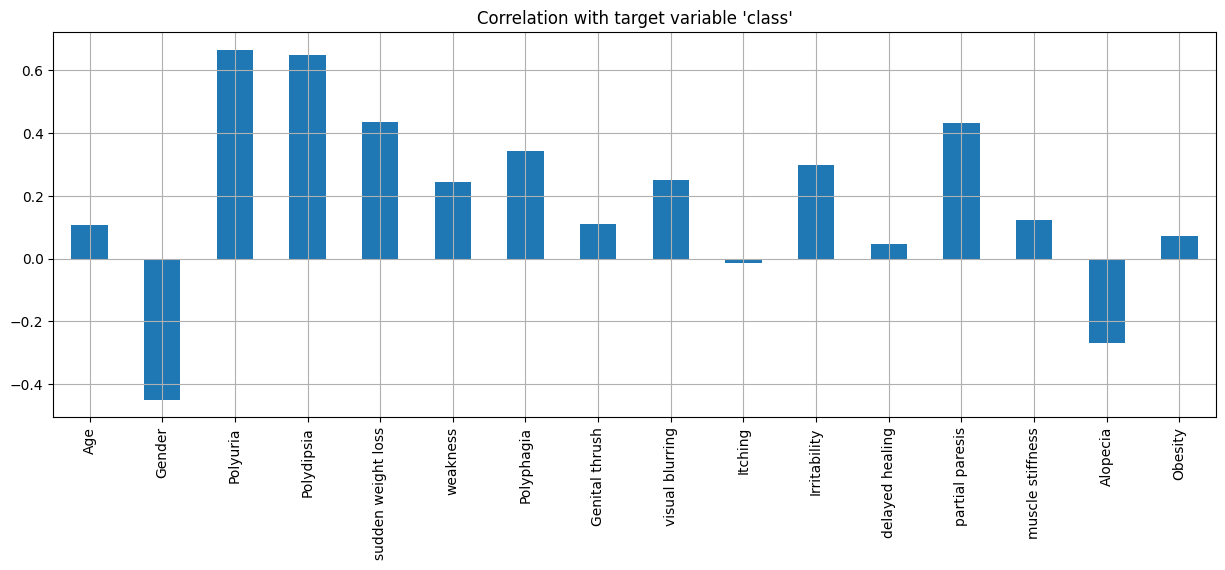

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Let's assume you have already loaded your dataset into 'Diabetes'

# Make a copy of the dataset
dtacpy1 = Diabetes.copy()

# Initialize LabelEncoder
number = preprocessing.LabelEncoder()

# Apply LabelEncoder to each column in the dataset
for column in dtacpy1.columns:
    dtacpy1[column] = number.fit_transform(dtacpy1[column])

# Separate features (X) and target variable (y)
X = dtacpy1.drop('class', axis=1)
y = dtacpy1['class']

# Compute correlation between features and target variable
correlation = X.apply(lambda x: x.corr(y))

# Plot the correlation
correlation.plot.bar(title="Correlation with target variable 'class'", grid=True, figsize=(15, 5))
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'dtacpy1' is your DataFrame
X = dtacpy1.drop('class', axis=1)
y = dtacpy1['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=0)

# Train the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Perform cross-validation on the training set
accuracies = cross_val_score(estimator=logreg_model, X=X_train, y=y_train, cv=10)

# Display the cross-validation results
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


Accuracy: 0.94
Confusion Matrix:
[[56  6]
 [ 4 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        62
           1       0.94      0.96      0.95        94

    accuracy                           0.94       156
   macro avg       0.94      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156

Accuracy: 92.58 %
Standard Deviation: 3.72 %


#DECISION TREE CLASSIFIER

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(classification_rep_dt)

# Perform cross-validation on the training set
accuracies_dt = cross_val_score(estimator=dt_model, X=X_train, y=y_train, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_dt.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std() * 100))


Decision Tree Model:
Accuracy: 0.97
Confusion Matrix:
[[61  1]
 [ 3 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.99      0.97      0.98        94

    accuracy                           0.97       156
   macro avg       0.97      0.98      0.97       156
weighted avg       0.97      0.97      0.97       156

Cross-Validation Results:
Accuracy: 96.16 %
Standard Deviation: 2.21 %


#SUPPORT VECTOR MACHINE

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already scaled your features (X_train_scaled, X_test_scaled)
# If not, scale your features using StandardScaler before using the SVC with RBF kernel.

# Create a Nonlinear SVC with RBF kernel
svc_rbf_model = SVC(kernel='rbf', random_state=0)

# Train the model on the scaled training data
svc_rbf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_svc_rbf = svc_rbf_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)
classification_rep_svc_rbf = classification_report(y_test, y_pred_svc_rbf)

print("Nonlinear SVC with RBF Kernel:")
print(f"Accuracy: {accuracy_svc_rbf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_svc_rbf)
print("Classification Report:")
print(classification_rep_svc_rbf)

# Perform cross-validation on the training set
accuracies_svc_rbf = cross_val_score(estimator=svc_rbf_model, X=X_train_scaled, y=y_train, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_svc_rbf.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_svc_rbf.std() * 100))


Nonlinear SVC with RBF Kernel:
Accuracy: 0.96
Confusion Matrix:
[[59  3]
 [ 3 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        62
           1       0.97      0.97      0.97        94

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156

Cross-Validation Results:
Accuracy: 95.32 %
Standard Deviation: 4.49 %


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already scaled your features (X_train_scaled, X_test_scaled)
# If not, scale your features using StandardScaler before using the Linear SVM.

# Create a Linear SVM model
linear_svm_model = SVC(kernel='linear', random_state=0)

# Train the model on the scaled training data
linear_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_linear_svm = linear_svm_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
conf_matrix_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
classification_rep_linear_svm = classification_report(y_test, y_pred_linear_svm)

print("Linear Support Vector Machine:")
print(f"Accuracy: {accuracy_linear_svm:.2f}")
print("Confusion Matrix:")
print(conf_matrix_linear_svm)
print("Classification Report:")
print(classification_rep_linear_svm)

# Perform cross-validation on the training set
accuracies_linear_svm = cross_val_score(estimator=linear_svm_model, X=X_train_scaled, y=y_train, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_linear_svm.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_linear_svm.std() * 100))


Linear Support Vector Machine:
Accuracy: 0.92
Confusion Matrix:
[[54  8]
 [ 5 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        62
           1       0.92      0.95      0.93        94

    accuracy                           0.92       156
   macro avg       0.92      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156

Cross-Validation Results:
Accuracy: 90.39 %
Standard Deviation: 3.72 %


#GRADIENT BOOST

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already scaled your features (X_train_scaled, X_test_scaled)
# If not, scale your features using StandardScaler before using the Gradient Boosting Classifier.

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=0)

# Train the model on the scaled training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(classification_rep_gb)

# Perform cross-validation on the training set
accuracies_gb = cross_val_score(estimator=gb_classifier, X=X_train_scaled, y=y_train, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_gb.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_gb.std() * 100))


Gradient Boosting Classifier:
Accuracy: 0.97
Confusion Matrix:
[[60  2]
 [ 2 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.98      0.98      0.98        94

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Cross-Validation Results:
Accuracy: 96.70 %
Standard Deviation: 2.70 %


#RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already scaled your features (X_train_scaled, X_test_scaled)
# If not, scale your features using StandardScaler before using the Random Forest Classifier.

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Train the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)

# Perform cross-validation on the training set
accuracies_rf = cross_val_score(estimator=rf_classifier, X=X_train_scaled, y=y_train, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_rf.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_rf.std() * 100))


Random Forest Classifier:
Accuracy: 0.98
Confusion Matrix:
[[61  1]
 [ 2 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.99      0.98      0.98        94

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

Cross-Validation Results:
Accuracy: 97.55 %
Standard Deviation: 2.55 %


In [35]:
table=pd.DataFrame({"Accuracy":[accuracies_dt.mean(),accuracies.mean(),accuracies_gb.mean(),accuracies_rf.mean(),accuracies_linear_svm.mean(),accuracies_svc_rbf.mean()]},
                   index=["Decision Tree Classifier","Logistic Regression","Gradient Boost", "Random Forest","Linear SVC","Linear SVC"])
table

,Accuracy
Decision Tree Classifier,0.961562
Logistic Regression,0.925751
Gradient Boost,0.966967
Random Forest,0.975450
Linear SVC,0.903904
Linear SVC,0.953153


In [36]:
import joblib
# saveing the model on disk
joblib.dump(rf_classifier,"diabetic_predictor.pkl")
joblib.dump(scaler,"Standard_Scalar.pkl")

['Standard_Scalar.pkl']